# **Recommender Systems**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
movies=pd.read_fwf('/content/drive/MyDrive/zee-movies.dat', encoding='ISO-8859-1')
print(movies.shape)
movies.head()

(3883, 3)


,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [ ]:
movies.drop(['Unnamed: 1','Unnamed: 2'],axis=1,inplace=True)

delimiter='::'
movies=movies['Movie ID::Title::Genres'].str.split(delimiter,expand=True)
movies.columns=['Movie_ID','Title','Genres']

In [ ]:
movies=movies.rename(columns={'Movie_ID':'MovieID'})

In [ ]:
print(movies.shape)
movies.head(10)

(3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
users=pd.read_fwf('/content/drive/MyDrive/zee-users.dat', encoding='ISO-8859-1')
users=users['UserID::Gender::Age::Occupation::Zip-code'].str.split(delimiter,expand=True)
users.columns=['UserID','Gender','Age','Occupation','Zip-code']
print(users.shape)
users.head()

(6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
ratings=pd.read_fwf('/content/drive/MyDrive/zee-ratings.dat', encoding='ISO-8859-1')
ratings=ratings['UserID::MovieID::Rating::Timestamp'].str.split(delimiter,expand=True)
ratings.columns=['UserID','MovieID','Rating','Timestamp']
print(ratings.shape)
ratings.head()

(1000209, 4)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# **EDA on "movies" dataframe**

In [ ]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   object
 1   Title    3883 non-null   object
 2   Genres   3858 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


## **Checking Missing values**

In [ ]:
movies.isna().sum() #there are 25 missing values present in genres

MovieID     0
Title       0
Genres     25
dtype: int64

In [ ]:
movies=movies.dropna()  # drop 25 missing vlues
movies.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

## **Checking duplicates**

In [ ]:
bool_series = movies.duplicated() # From value count we can see that there are no duplicate values in this dataframe.
bool_series.value_counts()

False    3858
dtype: int64

In [ ]:
movies['Title'].value_counts() # no movie title got repeated

Toy Story (1995)                           1
Dick Tracy (1990)                          1
Son of Frankenstein (1939)                 1
Ghost of Frankenstein, The (1942)          1
Frankenstein Meets the Wolf Man (1943)     1
                                          ..
Alien³ (1992)                              1
American Werewolf in London, An (1981)     1
Amityville 1992: It's About Time (1992)    1
Amityville 3-D (1983)                      1
Contender, The (2000)                      1
Name: Title, Length: 3858, dtype: int64

In [ ]:
movies["Genres"].value_counts().head(10) # Top 10 genres movie
                                        # maximum movies are from gener drama
                                        # second highest movie are from genre Comedy

Drama             830
Comedy            518
Horror            172
Comedy|Drama      159
Comedy|Romance    136
Drama|Romance     128
Documentary       106
Thriller          101
Action             65
Drama|Thriller     63
Name: Genres, dtype: int64

In [ ]:
movies["Genres"].value_counts().tail(5)  # last 5 genre movies is a mixed of genres
                                         # from this we can say one movie can has more than one genre.

Action|Adventure|Children's                      1
Action|Adventure|Children's|Fantasy              1
Action|Adventure|Sci-Fi|Th                       1
Adventure|Animation|Children's|Comedy|Musical    1
Drama|Fantas                                     1
Name: Genres, dtype: int64

## **'movies' Data Preprocessing**

In [ ]:
m = movies.copy()
m['Genres'] = m['Genres'].str.split('|')
m = m.explode('Genres')
m = m.pivot(index='MovieID', columns='Genres', values='Title')
m = ~m.isna()
m = m.astype(int)
m.head(10)


Genres,,A,Acti,Action,Adv,Advent,Adventu,Adventur,Adventure,Animati,...,Sci-Fi,Th,Thri,Thrille,Thriller,Wa,War,We,Wester,Western
MovieID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
m.columns  # from this we can see the same columns are with different names
           # we have to modify the columns name

Index(['', 'A', 'Acti', 'Action', 'Adv', 'Advent', 'Adventu', 'Adventur',
       'Adventure', 'Animati', 'Animation', 'Chi', 'Chil', 'Childr', 'Childre',
       'Children', 'Children'', 'Children's', 'Com', 'Come', 'Comed', 'Comedy',
       'Crime', 'D', 'Docu', 'Documen', 'Document', 'Documenta', 'Documentary',
       'Dr', 'Dram', 'Drama', 'F', 'Fant', 'Fantas', 'Fantasy', 'Film-Noir',
       'Horr', 'Horro', 'Horror', 'Music', 'Musical', 'Mystery', 'R', 'Ro',
       'Rom', 'Roma', 'Roman', 'Romance', 'S', 'Sci', 'Sci-', 'Sci-F',
       'Sci-Fi', 'Th', 'Thri', 'Thrille', 'Thriller', 'Wa', 'War', 'We',
       'Wester', 'Western'],
      dtype='object', name='Genres')

In [ ]:
m['Dr'].value_counts()

0    3855
1       3
Name: Dr, dtype: int64

In [ ]:
m['Dram'].value_counts()

0    3855
1       3
Name: Dram, dtype: int64

In [ ]:
m['Drama'].value_counts() # if i assume 'Dr','Dram','Drama' is a same genre name for different movie
                          # but should show same value_counts for all the 'Dr','Dram','Drama' hence i am adding all the value and making one 'Drama' column

0    2282
1    1576
Name: Drama, dtype: int64

In [ ]:
m['Animati'].value_counts()

0    3857
1       1
Name: Animati, dtype: int64

In [ ]:
m['Animation'].value_counts()  # from all these value counts we can see that each one has different values of boolen
                               # each has it's own value count we can rename it but we can not keep one and remove other
                               # because the genres is not duplicate column only it's name is different

0    3755
1     103
Name: Animation, dtype: int64

In [ ]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Getting series of lists by applying split operation.
movies.Genres = movies.Genres.str.split('|')
# Getting distinct genre types for generating columns of genre type.
genre_columns = list(set([j for i in movies['Genres'].tolist() for j in i]))
# Iterating over every list to create and fill values into columns.
for j in genre_columns:
    movies[j] = 0
for i in range(movies.shape[0]):
    for j in genre_columns:
        if(j in movies['Genres'].iloc[i]):
            movies.loc[i,j] = 1
# Separting movie title and year part using split function.
split_values = movies['Title'].str.split("(", n = 1, expand = True)
# setting 'movie_title' values to title part.
movies.Title = split_values[0]
# creating 'release_year' column.
movies['release_year'] = split_values[1]
# Cleaning the release_year series.
movies['release_year'] = movies.release_year.str.replace(')','')
# dropping 'genre' columns as it has already been one hot encoded.
movies.drop('Genres',axis=1,inplace=True)

In [ ]:
movies.head()

,MovieID,Title,,D,Crime,Drama,Musical,Sci-,Documen,Film-Noir,...,Com,Come,Chi,Wa,F,Wester,Animation,Adventur,Advent,release_year
0,1,Toy Story,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995
1,2,Jumanji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,3,Grumpier Old Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,4,Waiting to Exhale,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,5,Father of the Bride Part II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [ ]:
movies["release_year"].value_counts().head(20) # maximum movies release in year 1996

1996    326
1995    319
1998    304
1997    298
1999    265
1994    234
2000    153
1993    152
1986     97
1992     96
1990     73
1987     67
1988     66
1985     62
1984     57
1991     55
1989     55
1982     43
1980     39
1981     39
Name: release_year, dtype: int64

# **4) Most of the movies present in our dataset were released in 90s decade**


In [ ]:
movies.columns

Index(['MovieID', 'Title', '', 'D', 'Crime', 'Drama', 'Musical', 'Sci-',
       'Documen', 'Film-Noir', 'Childr', 'Document', 'Music', 'Adventu', 'We',
       'R', 'Roma', 'A', 'Comed', 'Mystery', 'Children's', 'Sci-F', 'S',
       'Chil', 'Romance', 'Fantasy', 'Fant', 'Dr', 'Thriller', 'Action',
       'Animati', 'Horro', 'Fantas', 'Ro', 'Children', 'Documentary',
       'Children'', 'Horror', 'Roman', 'Docu', 'Adventure', 'Sci-Fi', 'Dram',
       'Th', 'Thrille', 'Western', 'War', 'Comedy', 'Childre', 'Rom', 'Sci',
       'Acti', 'Horr', 'Thri', 'Documenta', 'Adv', 'Com', 'Come', 'Chi', 'Wa',
       'F', 'Wester', 'Animation', 'Adventur', 'Advent', 'release_year'],
      dtype='object')

In [ ]:
movies=movies.dropna()  # drop 25 missing vlues
movies.isna().sum()

MovieID         0
Title           0
                0
D               0
Crime           0
               ..
Wester          0
Animation       0
Adventur        0
Advent          0
release_year    0
Length: 66, dtype: int64

## **Preprosessing of Movies Dataframe to build the recommendation system**

In [ ]:
movies["adventure"]=movies.apply(lambda row: row[""] + row["A"] + row['Action'] + row['Adv'] +row['Advent'] + row['Adventu']
                                             + row['Adventur'] + row['Adventure'],axis=1)
movies=movies.drop(['', 'A', 'Acti', 'Action', 'Adv', 'Advent', 'Adventu', 'Adventur','Adventure'],axis=1)

In [ ]:
movies["animation"]=movies.apply(lambda row: row['Animati']+ row['Animation'],axis=1)
movies=movies.drop(['Animati', 'Animation'],axis=1)

In [ ]:
movies["children"]= movies.apply(lambda row: row['Chi']+ row['Chil']+ row['Childr']+ row['Childre']+ row['Children'],axis=1)
movies=movies.drop(['Chi', 'Chil', 'Childr', 'Childre','Children'],axis=1)

In [ ]:
movies['comedy']=movies.apply(lambda row: row['Com']+ row['Come'] + row['Comed']+ row['Comedy'],axis=1)
movies=movies.drop(['Com', 'Come', 'Comed', 'Comedy'],axis=1)

In [ ]:
movies['documentary']=movies.apply(lambda row: row['D']+ row['Docu']+ row['Documen']+ row['Document']+ row['Documenta']
                                   + row['Documentary'],axis=1)
movies=movies.drop(['D', 'Docu', 'Documen', 'Document', 'Documenta', 'Documentary'],axis=1)

In [ ]:
movies["drama"] = movies.apply(lambda row: row["Dr"] + row["Dram"] + row["Drama"], axis=1)
movies=movies.drop(["Dr", "Dram", "Drama"], axis=1)

In [ ]:
movies['fantasy']=movies.apply(lambda row: row['F']+ row['Fant']+ row['Fantas']+ row['Fantasy'],axis=1)
movies=movies.drop(['F', 'Fant', 'Fantas', 'Fantasy'],axis=1)

In [ ]:
movies['horror']=movies.apply(lambda row: row['Horr']+ row['Horro']+ row['Horror'],axis=1)
movies=movies.drop(['Horr', 'Horro', 'Horror'],axis=1)

In [ ]:
movies["music"]=movies.apply(lambda row: row['Music']+ row['Musical'],axis=1)
movies=movies.drop(['Music', 'Musical'],axis=1)

In [ ]:
movies['romance']=movies.apply(lambda row: row['R']+ row['Ro']+ row['Rom']+ row['Roma']+ row['Roman']+ row['Romance'],axis=1)
movies=movies.drop(['R', 'Ro','Rom', 'Roma', 'Roman', 'Romance'],axis=1)

In [ ]:
movies['sci-Fi']=movies.apply(lambda row: row['S']+ row['Sci']+ row['Sci-']+ row['Sci-F']+ row['Sci-Fi'],axis=1)
movies=movies.drop(['S', 'Sci', 'Sci-', 'Sci-F','Sci-Fi'],axis=1)

In [ ]:
movies['thriller']=movies.apply(lambda row: row['Th']+ row['Thri']+ row['Thrille']+ row['Thriller'],axis=1)
movies=movies.drop(['Th', 'Thri', 'Thrille', 'Thriller'],axis=1)

In [ ]:
movies['war']=movies.apply(lambda row: row['Wa']+ row['War'],axis=1)
movies=movies.drop(['Wa', 'War'],axis=1)

In [ ]:
movies['western']=movies.apply(lambda row: row['We']+ row['Wester']+ row['Western'],axis=1)
movies=movies.drop(['We','Wester', 'Western'],axis=1)

In [ ]:
print(movies.shape)
movies.head()

(3858, 22)


,MovieID,Title,Crime,Film-Noir,Mystery,Children's,Children',release_year,adventure,animation,...,documentary,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western
0,1,Toy Story,0.0,0.0,0.0,1.0,0.0,1995,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,0.0,0.0,0.0,1.0,0.0,1995,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,0.0,0.0,0.0,0.0,0.0,1995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,0.0,0.0,0.0,0.0,0.0,1995,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,0.0,0.0,0.0,0.0,0.0,1995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movies['Release_year']=movies['release_year']
movies=movies.drop('release_year',axis=1)

In [ ]:
movies.head() # in data preprocessing we Reduce columns count from 63 to 22 columns.

,MovieID,Title,Crime,Film-Noir,Mystery,Children's,Children',adventure,animation,children,...,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western,Release_year
0,1,Toy Story,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,2,Jumanji,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,3,Grumpier Old Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1995
3,4,Waiting to Exhale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,5,Father of the Bride Part II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [ ]:
movies.loc[movies["MovieID"]== '1485']

,MovieID,Title,Crime,Film-Noir,Mystery,Children's,Children',adventure,animation,children,...,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western,Release_year
1455,1485,Liar Liar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1997


# **item-item similarity Recommendation**

In [ ]:
movies.head() # item-item symilaruty matrix

,MovieID,Title,Crime,Film-Noir,Mystery,Children's,Children',adventure,animation,children,...,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western,Release_year
0,1,Toy Story,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,2,Jumanji,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,3,Grumpier Old Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1995
3,4,Waiting to Exhale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,5,Father of the Bride Part II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [ ]:
a=m.iloc[0].values
b = m.iloc[1485].values

In [ ]:
a,b

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
def hamming_distance(x, y):
 return sum(abs(x-y))

In [ ]:
hamming_distance(a, b) # hamming distance between movieid 1 and 1485 is 3 which indicated these movies are similar as hammiming distance should be less for similarity.


3

In [ ]:
movies.shape

(3858, 22)

In [ ]:
ranks = []
for query in m.index[500:1000]:
  for candidate in m.index[500:1000]:
    if candidate == query:
      continue
    ranks.append([query, candidate, hamming_distance(m.loc[query], m.loc[candidate])])


In [ ]:
ranks = pd.DataFrame(ranks, columns=['query', 'candidate', 'distance'])
ranks = ranks.merge(movies[['MovieID', 'Title']], left_on='query', right_on='MovieID').rename(columns={'Title':'query_title'}).drop(columns='MovieID')
ranks = ranks.merge(movies[['MovieID', 'Title']], left_on='candidate', right_on='MovieID').rename(columns={'Title':'Candidate_title'}).drop(columns='MovieID')
ranks = ranks.sort_values(by=['query', 'distance'])

In [ ]:
ranks.head()

,query,candidate,distance,query_title,Candidate_title
8982,1464,1484,0,Lost Highway,"Daytrippers, The"
80838,1464,1625,1,Lost Highway,"Game, The"
114271,1464,1689,1,Lost Highway,"Man Who Knew Too Little, The"
215568,1464,1892,1,Lost Highway,"Perfect Murder, A"
227544,1464,1913,1,Lost Highway,Picnic at Hanging Rock


In [ ]:
ranks.loc[ranks['query']== '1485'].head(10)


,query,candidate,distance,query_title,Candidate_title
12495,1485,1490,0,Liar Liar,B*A*P*S
13493,1485,1494,0,Liar Liar,"Sixth Man, The"
18982,1485,1503,0,Liar Liar,8 Heads in a Duffel Bag
22475,1485,1511,0,Liar Liar,A Chef in Love
22974,1485,1513,0,Liar Liar,Romy and Michele's High School Reunion
24471,1485,1516,0,Liar Liar,Children of the Revolution
24970,1485,1517,0,Liar Liar,Austin Powers: International Man of Mystery
29461,1485,1526,0,Liar Liar,Fathers' Day
30459,1485,1528,0,Liar Liar,Intimate Relations
32455,1485,1532,0,Liar Liar,Sprung


### **The top 10 movies can be recommended to a movie titled "Liar Liar" on the basis of item base recommendations are as follows:**

In [ ]:
ranks.loc[ranks['candidate'] == '1485'][ranks['distance']==0].head(10)  # as the haming distance is "0" hence these movies are similar with movie title "lier-lier"

,query,candidate,distance,query_title,Candidate_title
9506,1490,1485,0,B*A*P*S,Liar Liar
9508,1494,1485,0,"Sixth Man, The",Liar Liar
9519,1503,1485,0,8 Heads in a Duffel Bag,Liar Liar
9526,1511,1485,0,A Chef in Love,Liar Liar
9527,1513,1485,0,Romy and Michele's High School Reunion,Liar Liar
9530,1516,1485,0,Children of the Revolution,Liar Liar
9531,1517,1485,0,Austin Powers: International Man of Mystery,Liar Liar
9540,1526,1485,0,Fathers' Day,Liar Liar
9542,1528,1485,0,Intimate Relations,Liar Liar
9546,1532,1485,0,Sprung,Liar Liar


In [ ]:
Liar_liar=ranks.loc[ranks['candidate'] == '1485'][ranks['distance']==0]

In [ ]:
len(Liar_liar) # There are almost 62 movies similar with the movie title 'Liar Liar'

62

In [ ]:
Liar_liar['query_title'].head(10)  # Movie similar with the "Liar Liar" movie on the item base recommendation

9506                                        B*A*P*S 
9508                                 Sixth Man, The 
9519                        8 Heads in a Duffel Bag 
9526                                 A Chef in Love 
9527         Romy and Michele's High School Reunion 
9530                     Children of the Revolution 
9531    Austin Powers: International Man of Mystery 
9540                                   Fathers' Day 
9542                             Intimate Relations 
9546                                         Sprung 
Name: query_title, dtype: object

# **EDA on "users" dataframe**

In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.replace({'Age': {'1': "Under 18",
                       '18': "18-24",
                       '25': "25-34",
                       '35': "35-44",
                       '45': "45-49",
                       '50': "50-55",
                       '56': "56+" }} , inplace=True)

In [ ]:
users.replace({'Occupation':{'0': "other",
                             '1': "academic/educator",
                             '2': "artist",
                             '3': "clerical/admin",
                             '4': "college/grad student",
                             '5': "customer service",
                             '6': "doctor/health care",
                             '7': "executive/managerial",
                             '8': "farmer",
                             '9': "homemaker",
                            '10': "K-12 student",
                            '11': "lawyer",
                            '12': "programmer",
                            '13': "retired",
                            '14': "sales/marketing",
                            '15': "scientist",
                            '16': "self-employed",
                            '17': "technician/engineer",
                            '18': "tradesman/craftsman",
                            '19': "unemployed",
                            '20': "writer"}},inplace=True)

In [ ]:
print(users.shape)
users.head()

(6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [ ]:
users.describe(include='object')

,UserID,Gender,Age,Occupation,Zip-code
count,6040,6040,6040,6040,6040
unique,6040,2,7,21,3439
top,1,M,25-34,college/grad student,48104
freq,1,4331,2096,759,19


## **Checking Missing value**

In [ ]:
users.isna().sum()  # No missing values

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

## **Checking duplicates**

In [ ]:
bool_series = users.duplicated() # From value count we can see that there are no duplicate values in this dataframe.
bool_series.value_counts()

False    6040
dtype: int64

In [ ]:
users["Gender"].value_counts()

M    4331
F    1709
Name: Gender, dtype: int64

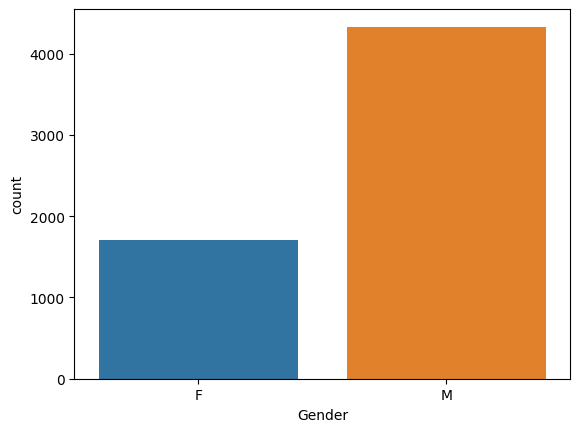

In [ ]:
sns.countplot(data=users,x="Gender") # Visual representation of the above code
plt.show()

In [ ]:
users["Age"].value_counts()  # maximum viewer are of age limit 25-34 years

25-34       2096
35-44       1193
18-24       1103
45-49        550
50-55        496
56+          380
Under 18     222
Name: Age, dtype: int64

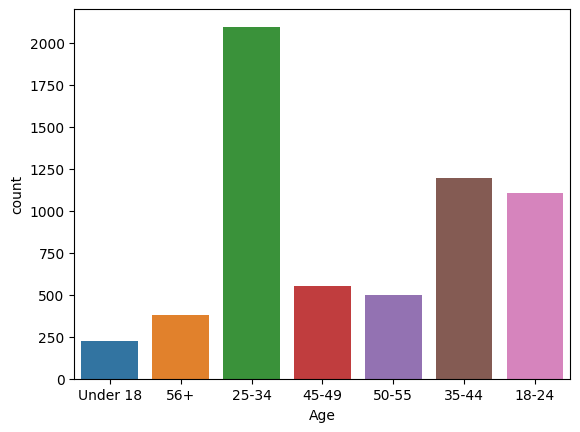

In [ ]:
sns.countplot(data=users,x="Age") # Visual representation of the above code
plt.show()

In [ ]:
users["Occupation"].value_counts() # maximum viwer are from college/grad students

college/grad student    759
other                   711
executive/managerial    679
academic/educator       528
technician/engineer     502
programmer              388
sales/marketing         302
writer                  281
artist                  267
self-employed           241
doctor/health care      236
K-12 student            195
clerical/admin          173
scientist               144
retired                 142
lawyer                  129
customer service        112
homemaker                92
unemployed               72
tradesman/craftsman      70
farmer                   17
Name: Occupation, dtype: int64

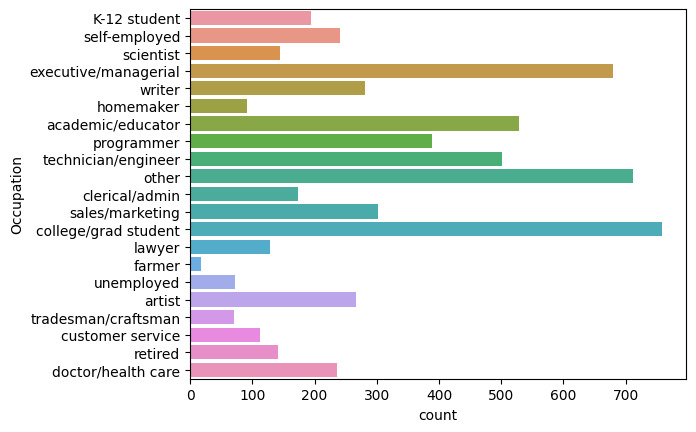

In [ ]:
sns.countplot(data=users,y="Occupation") # Visual representation of the above code
plt.show()

# **EDA on "ratings" dataframe**

In [ ]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  object
 1   MovieID    1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [ ]:
ratings.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
bool_series = ratings.duplicated() # From value count we can see that there are no duplicate values in this dataframe.
bool_series.value_counts()

False    1000209
dtype: int64

In [ ]:
ratings['Rating'].value_counts()  # maximum movies got rating 4

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

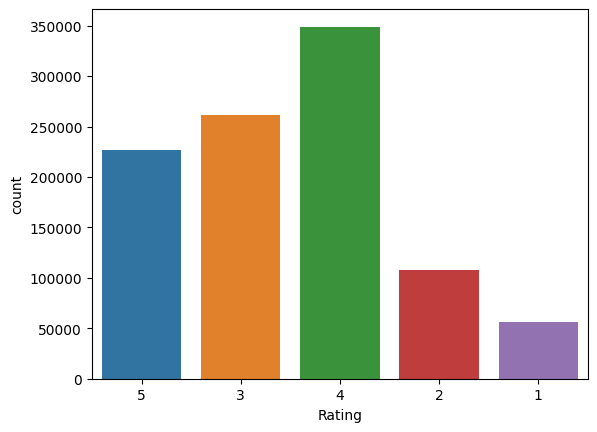

In [ ]:
sns.countplot(data=ratings,x="Rating") # Visual representation of the above code
plt.show()

In [ ]:
movies.shape

(3858, 22)

In [ ]:
users.shape

(6040, 5)

In [ ]:
ratings.shape

(1000209, 4)

In [ ]:
movies.columns

Index(['MovieID', 'Title', 'Crime', 'Film-Noir', 'Mystery', 'Children's',
       'Children'', 'adventure', 'animation', 'children', 'comedy',
       'documentary', 'drama', 'fantasy', 'horror', 'music', 'romance',
       'sci-Fi', 'thriller', 'war', 'western', 'Release_year'],
      dtype='object')

In [ ]:
users.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [ ]:
ratings.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

In [ ]:
rating_count = pd.DataFrame(ratings.groupby('MovieID')['Rating'].count())
rating_count.sort_values('Rating', ascending=False).head()

,Rating
MovieID,
2858,3428
260,2991
1196,2990
1210,2883
480,2672


### **The Movie with MovieID “2858” received the most rating counts. Let’s find out which movie it is, and what are the high rated movies in the top 5.**

In [ ]:
most_rated_movie = pd.DataFrame(['2858','260','1196','1210','480'], index=np.arange(5), columns = ['MovieID'])
most_rated_movie_summary = pd.merge(most_rated_movie, movies, on='MovieID')
most_rated_movie_summary

,MovieID,Title,Crime,Film-Noir,Mystery,Children's,Children',adventure,animation,children,...,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western,Release_year
0,2858,American Beauty,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1999
1,260,Star Wars: Episode IV - A New Hope,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977
2,1196,Star Wars: Episode V - The Empire Strikes Back,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1980
3,1210,Star Wars: Episode VI - Return of the Jedi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1983
4,480,Jurassic Park,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993


In [ ]:
most_rated_movie_summary['Title']  # top 5 movies based on the highest rating by user

0                                   American Beauty 
1                Star Wars: Episode IV - A New Hope 
2    Star Wars: Episode V - The Empire Strikes Back 
3        Star Wars: Episode VI - Return of the Jedi 
4                                     Jurassic Park 
Name: Title, dtype: object

## **5)** **The movie with maximum no. of ratings is "American Beauty"**

# **Merging the data files and creating a single consolidated dataframe**

In [ ]:
select_movies = ratings.MovieID.value_counts().head(1000).index.to_list() # takeing first 1000 movies
movies = movies.loc[movies.MovieID.isin(select_movies)]
ratings = ratings.loc[ratings.MovieID.isin(select_movies)]

In [ ]:
print(movies.shape)
print(users.shape)
print(ratings.shape)

(996, 22)
(6040, 5)
(747869, 4)


In [ ]:
final_df = ratings[['UserID', 'MovieID', 'Rating', 'Timestamp']].copy()
final_df = final_df.merge(users.reset_index(), on='UserID', how='right')
final_df = final_df.merge(movies.reset_index(), on='MovieID', how='right')
final_df.head()

,UserID,MovieID,Rating,Timestamp,index_x,Gender,Age,Occupation,Zip-code,index_y,...,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western,Release_year
0,1,1,5,978824268,0,F,Under 18,K-12 student,48067,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,6,1,4,978237008,5,F,50-55,homemaker,55117,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,8,1,4,978233496,7,M,25-34,programmer,11413,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,9,1,5,978225952,8,M,25-34,technician/engineer,61614,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,10,1,5,978226474,9,F,35-44,academic/educator,95370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [ ]:
final_df.shape

(744913, 31)

In [ ]:
final_df.isna().sum()

UserID          0
MovieID         0
Rating          0
Timestamp       0
index_x         0
Gender          0
Age             0
Occupation      0
Zip-code        0
index_y         0
Title           0
Crime           0
Film-Noir       0
Mystery         0
Children's      0
Children'       0
adventure       0
animation       0
children        0
comedy          0
documentary     0
drama           0
fantasy         0
horror          0
music           0
romance         0
sci-Fi          0
thriller        0
war             0
western         0
Release_year    0
dtype: int64

In [ ]:
final_df.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'index_x', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'index_y', 'Title', 'Crime', 'Film-Noir',
       'Mystery', 'Children's', 'Children'', 'adventure', 'animation',
       'children', 'comedy', 'documentary', 'drama', 'fantasy', 'horror',
       'music', 'romance', 'sci-Fi', 'thriller', 'war', 'western',
       'Release_year'],
      dtype='object')

In [ ]:
# let's drop useless columns
final_df=final_df.drop(['index_x','index_y','Zip-code'],axis=1)

In [ ]:
final_df.groupby('Gender')['Rating'].count()

Gender
F    179844
M    565069
Name: Rating, dtype: int64

<Axes: xlabel='Gender'>

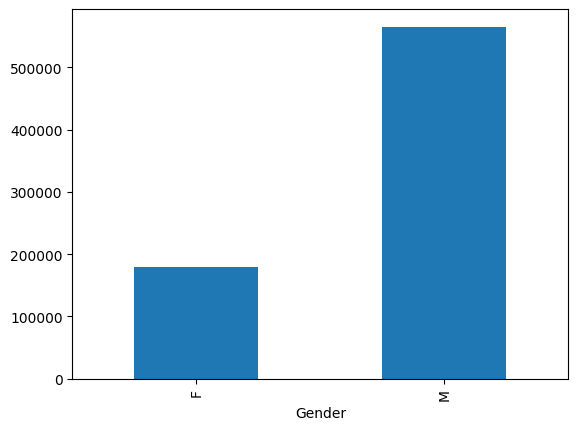

In [ ]:
final_df.groupby('Gender')['Rating'].count().plot(kind='bar') # maximum male rate the movies

## **3)** **Most of the users in our dataset who’ve rated the movies are Male. (True)**

In [ ]:
final_df.groupby('Age')['Rating'].count()

Age
18-24       139163
25-34       298127
35-44       147726
45-49        60043
50-55        51909
56+          27899
Under 18     20046
Name: Rating, dtype: int64

<Axes: xlabel='Age'>

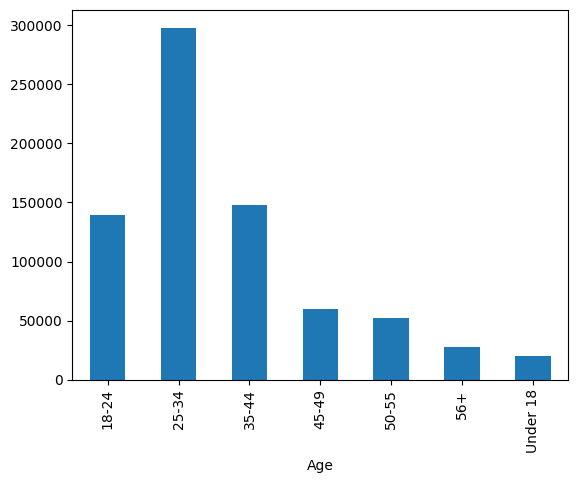

In [ ]:
final_df.groupby('Age')['Rating'].count().plot(kind='bar')

## **1) Users of age group 25-34 have watched and rated the most number of movies.**

In [ ]:
final_df.groupby('Occupation')['Rating'].count()

Occupation
K-12 student            17213
academic/educator       63152
artist                  36212
clerical/admin          22886
college/grad student    99160
customer service        16018
doctor/health care      27592
executive/managerial    79803
farmer                   1972
homemaker                8616
lawyer                  15759
other                   93605
programmer              45734
retired                  9931
sales/marketing         38025
scientist               18193
self-employed           33614
technician/engineer     57010
tradesman/craftsman      8454
unemployed              10483
writer                  41481
Name: Rating, dtype: int64

<Axes: xlabel='Occupation'>

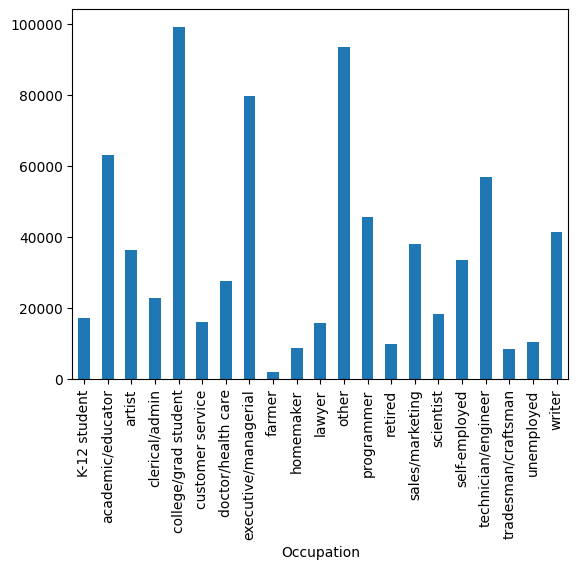

In [ ]:
final_df.groupby('Occupation')['Rating'].count().plot(kind='bar')

## **2) Users belonging to "college/grad student" profession have watched and rated the most movies.**

In [ ]:
x=final_df.head(2500)
average_rating = pd.DataFrame(x.groupby('UserID')['Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(x.groupby('UserID')['Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Rating,ratingCount
UserID,,
368,17.0,2
3590,27.0,2
23,21.0,2
2304,22.0,2
1666,22.0,2


# **Grouping the data in terms of Average Rating and No. of Ratings given.**

In [ ]:
#In order to grouping the data in terms of averate rating and no. of rating let's consider few counts from
#dataframe foe example 1500 rows
data=final_df.head(1500)
item_mean_rating = data.groupby('UserID')['Rating'].mean().sort_values(ascending=False)
item_rating_count = data.groupby('UserID')['Rating'].count().sort_values(ascending=False)

In [ ]:
data['Rating'].value_counts()

4    597
5    590
3    260
2     44
1      9
Name: Rating, dtype: int64

In [ ]:
item_ratings = pd.merge(item_mean_rating, item_rating_count, left_index=True, right_index=True)
item_ratings.columns = ['Mean Rating', 'Rating Count']

In [ ]:
item_ratings.head(10)

,Mean Rating,Rating Count
UserID,,
1,5.0,1
3930,5.0,1
3946,5.0,1
3943,5.0,1
231,5.0,1
2310,5.0,1
3940,5.0,1
2321,5.0,1
3935,5.0,1


# **Recommendations based on Pearsons correlations**

## **Creating a pivot table of movie titles & user id and imputing the NaN values**

In [ ]:
movies=pd.read_fwf('/content/drive/MyDrive/zee-movies.dat', encoding='ISO-8859-1')
print(movies.shape)
movies.head()
movies.drop(['Unnamed: 1','Unnamed: 2'],axis=1,inplace=True)

delimiter='::'
movies=movies['Movie ID::Title::Genres'].str.split(delimiter,expand=True)
movies.columns=['Movie_ID','Title','Genres']
movies=movies.dropna()
movies=movies.rename(columns={'Movie_ID':'MovieID'})

(3883, 3)


In [ ]:
select_movies = ratings.MovieID.value_counts().head(100).index.to_list()
movies1 = movies.loc[movies.MovieID.isin(select_movies)]
ratings1 = ratings.loc[ratings.MovieID.isin(select_movies)]


In [ ]:
# Merge the movies and ratings dataframes
merged_df = pd.merge(movies1, ratings1, on='MovieID')

In [ ]:
merged_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [ ]:
# Calculate the mean rating for each movie
movie_ratings = merged_df.groupby(['Title'])['Rating'].mean().reset_index()

In [ ]:
# Create a pivot table with users as rows and movies as columns
pivot_df = merged_df.pivot_table(index='UserID', columns='Title', values='Rating')

In [ ]:
# Fill in missing values with zeros
pivot_df = pivot_df.fillna(0)

In [ ]:
pivot_df.head()

Title,2001: A Space Odyssey (1968),"Abyss, The (1989)",Airplane! (1980),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),American Beauty (1999),American Pie (1999),Arachnophobia (1990),...,Total Recall (1990),Toy Story (1995),Toy Story 2 (1999),True Lies (1994),Twelve Monkeys (1995),"Usual Suspects, The (1995)",When Harry Met Sally... (1989),Who Framed Roger Rabbit? (1988),"Wizard of Oz, The (1939)",X-Men (2000)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10,3.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,0.0,0.0,...,0.0,5.0,4.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0
100,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0
1000,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,4.0,5.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0,4.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Calculate Pearson correlation between all pairs of movies
from scipy.stats import pearsonr
pearson_corr = pivot_df.T.corr(method='pearson')

# **User-User Recommendation matrix using correlation**

In [ ]:
pearson_corr

UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.155822,0.060973,0.031948,0.112914,0.005343,0.083697,0.026524,0.006573,0.005502,...,-0.043233,-0.073082,-0.094863,-0.027332,-0.095783,-0.046701,-0.025109,0.061438,0.063949,-0.049298
10,0.155822,1.000000,0.049491,0.004130,0.078344,-0.123004,-0.016311,0.070377,-0.001408,-0.013556,...,-0.159513,-0.037868,-0.147344,0.003571,-0.039786,0.023037,-0.008869,0.068325,0.009295,-0.160031
100,0.060973,0.049491,1.000000,0.282284,-0.128968,0.022662,0.492583,0.020982,0.042704,0.070630,...,-0.095803,0.106396,-0.000479,0.212704,0.281298,-0.088088,0.194821,0.173817,0.015058,0.346832
1000,0.031948,0.004130,0.282284,1.000000,-0.112826,-0.231309,0.140201,0.345710,0.299739,0.142013,...,0.062820,-0.044117,-0.153065,0.219387,0.508047,-0.061971,0.247287,0.038038,-0.153960,0.199003
1001,0.112914,0.078344,-0.128968,-0.112826,1.000000,0.149468,-0.053979,-0.069744,0.112381,0.231441,...,0.174722,-0.058781,0.201144,-0.054215,-0.182204,0.044371,0.094177,0.071212,0.364151,-0.026433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.046701,0.023037,-0.088088,-0.061971,0.044371,0.137104,-0.013194,-0.091642,0.050878,0.050888,...,-0.091012,0.454284,-0.053501,0.143577,0.054490,1.000000,-0.094893,-0.052419,0.244709,-0.155495
996,-0.025109,-0.008869,0.194821,0.247287,0.094177,0.108994,0.074333,-0.121251,0.107847,0.114895,...,-0.056116,-0.052404,-0.134871,0.197931,0.097006,-0.094893,1.000000,-0.026208,0.152011,0.138117
997,0.061438,0.068325,0.173817,0.038038,0.071212,-0.087833,0.117662,0.110539,-0.059975,-0.047952,...,0.202468,-0.052944,0.073660,0.164305,-0.028838,-0.052419,-0.026208,1.000000,0.284506,0.112549


In [ ]:
# Get the index of the movie to use as a basis for recommendations
movie_index = movie_ratings[movie_ratings['Title'] == 'Toy Story (1995)'].index[0]

In [ ]:
movie_index

90

In [ ]:
# Get the correlation scores for all movies compared to Toy Story
correlation_scores = list(enumerate(pearson_corr.iloc[movie_index]))

In [ ]:
# Sort the movies by correlation score
sorted_scores = sorted(correlation_scores, key=lambda x: x[1], reverse=True)

In [ ]:
len(correlation_scores)

6035

In [ ]:
#users = users.merge(r.groupby('UserID').Rating.mean().reset_index(), on='UserID')


# **Building a Recommender System based on Cosine Similarity.**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
movies=pd.read_fwf('/content/drive/MyDrive/zee-movies.dat', encoding='ISO-8859-1')
print(movies.shape)
movies.head()
movies.drop(['Unnamed: 1','Unnamed: 2'],axis=1,inplace=True)

delimiter='::'
movies=movies['Movie ID::Title::Genres'].str.split(delimiter,expand=True)
movies.columns=['Movie_ID','Title','Genres']
movies=movies.dropna()
movies=movies.rename(columns={'Movie_ID':'MovieID'})

(3883, 3)


In [ ]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# Merge the movies and ratings dataframes
merged_df = pd.merge(movies, ratings, on='MovieID')

# Calculate the mean rating for each movie
movie_ratings = merged_df.groupby(['Title'])['Rating'].mean().reset_index()

# Create a pivot table with users as rows and movies as columns
pivot_df = merged_df.pivot_table(index='UserID', columns='Title', values='Rating')

# Fill in missing values with zeros
pivot_df = pivot_df.fillna(0)

# Calculate cosine similarity between all pairs of movies
cosine_sim = cosine_similarity(pivot_df.T)

# Get the index of the movie to use as a basis for recommendations
movie_index = movie_ratings[movie_ratings['Title'] == 'Toy Story (1995)'].index[0]

# Get the similarity scores for all movies compared to Toy Story
similarity_scores = list(enumerate(cosine_sim[movie_index]))

# Sort the movies by similarity score
sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Get the titles of the top 10 recommended movies
recommended_movies = [movie_ratings.iloc[score[0]]['Title'] for score in sorted_scores[1:11]]

print(recommended_movies)

['Toy Story 2 (1999)', 'Groundhog Day (1993)', 'Aladdin (1992)', "Bug's Life, A (1998)", 'Back to the Future (1985)', 'Babe (1995)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Men in Black (1997)', 'Forrest Gump (1994)', 'Matrix, The (1999)']


In [ ]:
cosine_sim

array([[1.        , 0.19154759, 0.1656964 , ..., 0.17501399, 0.14114958,
        0.16205952],
       [0.19154759, 1.        , 0.38340804, ..., 0.15034793, 0.21861914,
        0.12008449],
       [0.1656964 , 0.38340804, 1.        , ..., 0.15091984, 0.11906648,
        0.06349066],
       ...,
       [0.17501399, 0.15034793, 0.15091984, ..., 1.        , 0.1996559 ,
        0.11766144],
       [0.14114958, 0.21861914, 0.11906648, ..., 0.1996559 , 1.        ,
        0.18017411],
       [0.16205952, 0.12008449, 0.06349066, ..., 0.11766144, 0.18017411,
        1.        ]])

### **Top 10 movie recommended to user who watach 'Toy story' movie using cosine similarity recommendation as follows:**

In [ ]:
recommended_movies  # According to cosine similarity model recommended these 10 movies for the movie 'Toy Story'

['Toy Story 2 (1999)',
 'Groundhog Day (1993)',
 'Aladdin (1992)',
 "Bug's Life, A (1998)",
 'Back to the Future (1985)',
 'Babe (1995)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Men in Black (1997)',
 'Forrest Gump (1994)',
 'Matrix, The (1999)']

# **Build a Recommender System based on Matrix Factorization.**

## **1) Create a Recommender System using the Matrix Factorization method**

## **2) Evaluate the model in terms of the Root Mean Squared Error and Mean Absolute Percentage Error**

## **3) Use embeddings for visualization and similarity-based models.**

In [ ]:
#CMFrec

In [ ]:
!pip install cmfrec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 KB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.21-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post4-cp39-cp39-linux_x86_64.whl size=5768379 sha256=c6cb1bf72cbcbbdd9b7a2a4776359b35226b5bc5daad9177ff8a0aa8d073afd1
  Stored in directory: /root/.cache/pip/wheels/fb/34/7e/98161f512b5008289e510c24b61e69b010bdebc26478273200
Successfully built cmfrec


In [ ]:
rm_raw = ratings[['UserID', 'MovieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating'] # Lib requires specific col
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3


In [ ]:
from cmfrec import CMF
model = CMF(k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
model.A_    ## item base embedding matrix

array([[ 0.1577192 ,  0.11946256],
       [ 0.13626184, -0.08588394],
       [ 0.1230676 ,  0.03035949],
       ...,
       [ 0.05705912, -0.13497287],
       [ 0.10859435, -0.11828611],
       [ 0.03586785, -0.41707113]], dtype=float32)

In [ ]:
model.A_.shape

(6040, 2)

In [ ]:
model.B_  # user base embedding matrix

array([[ 3.952424  , -1.5508546 ],
       [ 0.6313354 ,  2.1927283 ],
       [ 3.4319355 ,  0.17220859],
       ...,
       [-1.1981784 ,  4.855499  ],
       [ 1.1467948 ,  2.2549374 ],
       [ 2.807775  , -1.2090056 ]], dtype=float32)

In [ ]:
model.B_.shape

(1000, 2)

In [ ]:
model.glob_mean_  # overal average rating given by the user is 3.7

3.7055768966674805

## **Factorization matrix**

In [ ]:
np.dot(model.A_, model.B_.T) + model.glob_mean_     # This matrix tells us the item and user rating matrix by filling the appropriate rating given by each user to each movie.


array([[4.143681 , 4.0670996, 4.2674313, ..., 4.0966516, 4.155829 ,
        4.003986 ],
       [4.377335 , 3.6032836, 4.1584287, ..., 3.1253016, 3.6681783,
        4.1920037],
       [4.144909 , 3.849844 , 4.1331654, ..., 3.7055304, 3.915169 ,
        4.014418 ],
       ...,
       [4.140422 , 3.4456415, 3.8781567, ..., 2.9818492, 3.4666567,
        4.028969 ],
       [4.3182325, 3.5147672, 4.0578957, ..., 3.0011234, 3.5633845,
        4.153494 ],
       [4.4941587, 2.8136978, 3.7568498, ..., 1.6375124, 2.8062406,
        4.310527 ]], dtype=float32)

In [ ]:
movies=pd.read_fwf('/content/drive/MyDrive/zee-movies.dat', encoding='ISO-8859-1')
print(movies.shape)
movies.head()
movies.drop(['Unnamed: 1','Unnamed: 2'],axis=1,inplace=True)

delimiter='::'
movies=movies['Movie ID::Title::Genres'].str.split(delimiter,expand=True)
movies.columns=['Movie_ID','Title','Genres']
movies=movies.dropna()
movies=movies.rename(columns={'Movie_ID':'MovieID'})

(3883, 3)


In [ ]:
top_items = model.topN(user=100, n=10)           # Acoording to matrix factorization recommendation user no. 100 getting these top 10 movies get recommended.
movies.loc[movies.MovieID.isin(top_items)]



,MovieID,Title,Genres
49,50,"Usual Suspects, The (1995)",Crime|Thriller
735,745,"Close Shave, A (1995)",Animation|Comedy|Thriller
847,858,"Godfather, The (1972)",Action|Crime|Drama
892,904,Rear Window (1954),Mystery|Thriller
910,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir
911,923,Citizen Kane (1941),Drama
1132,1148,"Wrong Trousers, The (1993)",Animation|Comedy
1194,1212,"Third Man, The (1949)",Mystery|Thriller


## **Regression based for prediction of ratings**

In [ ]:
final_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Title,Crime,Film-Noir,...,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western,Release_year
0,1,1,5,978824268,F,Under 18,K-12 student,Toy Story,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,6,1,4,978237008,F,50-55,homemaker,Toy Story,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,8,1,4,978233496,M,25-34,programmer,Toy Story,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,9,1,5,978225952,M,25-34,technician/engineer,Toy Story,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,10,1,5,978226474,F,35-44,academic/educator,Toy Story,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [ ]:
df=final_df.copy()
df=df.drop(['UserID','MovieID','Title','Timestamp','Rating','Release_year'],axis=1)
df.head()

,Gender,Age,Occupation,Crime,Film-Noir,Mystery,Children's,Children',adventure,animation,...,documentary,drama,fantasy,horror,music,romance,sci-Fi,thriller,war,western
0,F,Under 18,K-12 student,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,50-55,homemaker,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,25-34,programmer,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,25-34,technician/engineer,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,35-44,academic/educator,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744913 entries, 0 to 744912
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Gender       744913 non-null  object 
 1   Age          744913 non-null  object 
 2   Occupation   744913 non-null  object 
 3   Crime        744913 non-null  float64
 4   Film-Noir    744913 non-null  float64
 5   Mystery      744913 non-null  float64
 6   Children's   744913 non-null  float64
 7   Children'    744913 non-null  float64
 8   adventure    744913 non-null  float64
 9   animation    744913 non-null  float64
 10  children     744913 non-null  float64
 11  comedy       744913 non-null  float64
 12  documentary  744913 non-null  float64
 13  drama        744913 non-null  float64
 14  fantasy      744913 non-null  float64
 15  horror       744913 non-null  float64
 16  music        744913 non-null  float64
 17  romance      744913 non-null  float64
 18  sci-Fi       744913 non-

In [ ]:
df_cat= df.select_dtypes(include=["object"])

In [ ]:
df_cat_dum = pd.get_dummies(df_cat, drop_first=True)

In [ ]:
df_cat_dum

,Gender_M,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_56+,Age_Under 18,Occupation_academic/educator,Occupation_artist,Occupation_clerical/admin,...,Occupation_other,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744908,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744909,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
744910,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744911,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df=df.drop(['Gender','Age','Occupation'],axis=1)
df= pd.concat([df, df_cat_dum], axis=1)

In [ ]:
X=df                          #initialization of data X: all features and y: target(Rating)
y=final_df['Rating']


In [ ]:
# Train, test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)

print(f"Sizes of the sets created are:\nTraining set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")

Sizes of the sets created are:
Training set:595930
Test set:148983


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([3.59112927, 3.61109054, 3.70002082, ..., 3.58502243, 3.66237647,
       3.69006078])

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse=mse(y_test, y_pred)
RMSE=mse**0.5
print("The Root Mean Squared Error is: ",RMSE)


The Root Mean Squared Error is:  1.0509801443940379


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error  #A lower MAPE indicates a better fit between the predicted and actual values here MAPE is 0.33
Mape = mean_absolute_percentage_error(y_test, y_pred)       # hence we can say model predicting the almost correct prediction of ratings
print("The Mean Absolute Percentage Error is: ",Mape)

The Mean Absolute Percentage Error is:  0.3306549765136444


## **The Root Mean Squared Error is:  1.0509**

## **The Mean Absolute Percentage Error is:  0.3306**

### **Recommend movie for 1 user**

In [ ]:
users.loc[1].append(movies.loc[1]).values.reshape(1, -1)


array([['2', 'M', '56+', 'self-employed', '70072', '2', 'Jumanji (1995)',
        "Adventure|Children's|Fantasy"]], dtype=object)

In [ ]:
df.loc[1].values.reshape(1, -1)


array([[0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
model.predict(df.loc[1].values.reshape(1, -1))  # according to the features of user 1 he/she will give rating 3.8 if we provide him/her the similar features movie

array([3.86277152])

# **Questionnaire:**

**1) Users of which age group have watched and rated the most number of movies?**
### **Ans:- Users of age group 25-30 years have watched and rated the most number of movies.**

**2) Users belonging to which profession have watched and rated the most movies?**

### **Ans:-Users belonging to college/grad student profession have watched and rated the most movies**

**3) Most of the users in our dataset who’ve rated the movies are Male. (T/F)**

### **Ans:- TRUE**

**4) Most of the movies present in our dataset were released in which decade?**

**70s b. 90s c. 50s d.80s**

### **Ans:- b. 90s**

**5) The movie with maximum no. of ratings is ___.**
### **Ans:- American Beauty**

**6) Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.**

### **Ans:- 1)A Chef in Love, 2) Romy and Michele's High School Reunion, 3)Children of the Revolution**

**7) On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.**

### **Ans:-On the basis of approach, Collaborative Filtering methods can be classified into User-based and item-based.**

**8) Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.**

### **Ans:-Pearson Correlation ranges between -1 to 1 whereas, Cosine Similarity belongs to the interval between 0 to 1.**

**9) Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.**

### **Ans:- The RMSE is 1.05 and MAPE is 0.33**

**10) Give the sparse ‘row’ matrix representation for the following dense matrix -**

[[1 0]
[3 7]]

### **Ans:-**

--#dense to sparse

from numpy import array

from scipy.sparse import csr_matrix

--#create dense matrix

A = array([[1, 0], [3,7]])

print(A)

--#convert to sparse matrix (CSR method)

S = csr_matrix(A)

print(S)

output:-
[[1 0]
 [3 7]]

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7

# **Actionable Insights & Recommendations:-**

1.   The target audience for ZEE entertainment is the occupation college/grade students, executives/managers, and others.
2.   Male gives more rating compared to female so with that zee get maximum data to build a robust recommendation model for new all users.

1.   ZEE target audience has an age limit of an average of 20-35 years.
2.   As the female audience is less so in order to increase female audience ZEE can provide free 30 days subscription



